<a href="https://colab.research.google.com/github/agrawalkunal2/IPL_T20_CricketAnalysis/blob/main/Kunal_Individual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

**Summary**




Initially I started with looking at each database available to us for the IPL project. I went through various columns available within each of the databases tried to make sense of what all data is available to us. I took ‘deliveries.csv’ and understood that it contained details of each ball bowled across various seasons of IPL. I quickly understood that we can found some common statistics pertaining to batting as well as bowling. I found out some of the statistics such as most 4s and 6s hit by batsman. I also tried looking into teams which scored the greatest number of 200+ runs and found out that RCBs have the greatest number of 200+ scores. At same time I wanted to see if the team scoring the greatest number of 200+ runs also has high number of wins. However, Mumbai Indians with highest win percentage comes at 4th position in the number of 200+ scores. In correlation matrix, I observed the greatest number of runs doesn’t necessarily convert into number of wins. Also, I tried to find out whether best performing teams maintain high powerplay scores. 
I tried to draw statistics regarding bowling, however, I observed that many bowlers just bowled for smaller number of overs to provide any meaningful statistics. Hence, to make meaningful conclusions, I restricted to only those bowlers who have done at least 120 deliveries. At the end, I also tried to make certain tables which can help in making real-time decisions such as batsman having issues in facing any type of delivery style in his IPL career. 


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Capstone 1/dat/'
df_deliveries = pd.read_csv(path + 'deliveries.csv')
df_players = pd.read_excel(path + 'Players.xlsx')
df_teams = pd.read_csv(path + 'teams.csv')
df_matches = pd.read_csv(path + 'matches.csv')

In [ ]:
# Analyzing the data which is present in deliveries dataframe
df_deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,2,0,0,0,0,0,2,2,NaN,NaN,NaN


In [ ]:
# Finding out the columns associated with the df
df_deliveries.columns.values

array(['match_id', 'inning', 'batting_team', 'bowling_team', 'over',
       'ball', 'batsman', 'non_striker', 'bowler', 'is_super_over',
       'wide_runs', 'bye_runs', 'legbye_runs', 'noball_runs',
       'penalty_runs', 'batsman_runs', 'extra_runs', 'total_runs',
       'player_dismissed', 'dismissal_kind', 'fielder'], dtype=object)

In [ ]:
# Looking at the structure of df
df_deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [ ]:
# finding the unique names of teams
df_deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kochi Tuskers Kerala'], dtype=object)

In [ ]:
# Changing the names of teams wherever they the franchisee have changed the name of their respective teams
# Here, we have written a function for changing the name and then we will be applying this function to the columns wherever we can find old names
def change_name(data):
    if data=='Delhi Daredevils':
        data='Delhi Capitals'
    elif data=='Deccan Chargers':
        data='Sunrisers Hyderabad'
    elif data=='Pune Warriors' or data=='Rising Pune Supergiant':
        data='Rising Pune Supergiants'
    return data    

In [ ]:
# applying the above function to the rows in deliveries and matches df
df_deliveries['batting_team']=df_deliveries['batting_team'].apply(lambda x:change_name(x))
df_deliveries['bowling_team']=df_deliveries['bowling_team'].apply(lambda x:change_name(x))
df_matches['team1']=df_matches['team1'].apply(lambda x:change_name(x))
df_matches['team2']=df_matches['team2'].apply(lambda x:change_name(x))
df_matches['toss_winner']=df_matches['toss_winner'].apply(lambda x:change_name(x))
df_matches['winner']=df_matches['winner'].apply(lambda x:change_name(x))

In [ ]:
# looking at players df
df_players.head()

,Player_Name,DOB,Batting_Hand,Bowling_Skill,Country
0,A Ashish Reddy,1991-02-24,Right_Hand,Right-arm medium,India
1,A Chandila,1983-12-05,Right_Hand,Right-arm offbreak,India
2,A Chopra,1977-09-19,Right_Hand,Right-arm offbreak,India
3,A Choudhary,NaT,Right_hand,Left-arm fast-medium,NaN
4,A Dananjaya,NaT,Right_Hand,Right-arm offbreak,NaN


Doing some basic analysis on data

**Most 4 Hits by a batsman (Top 10)**





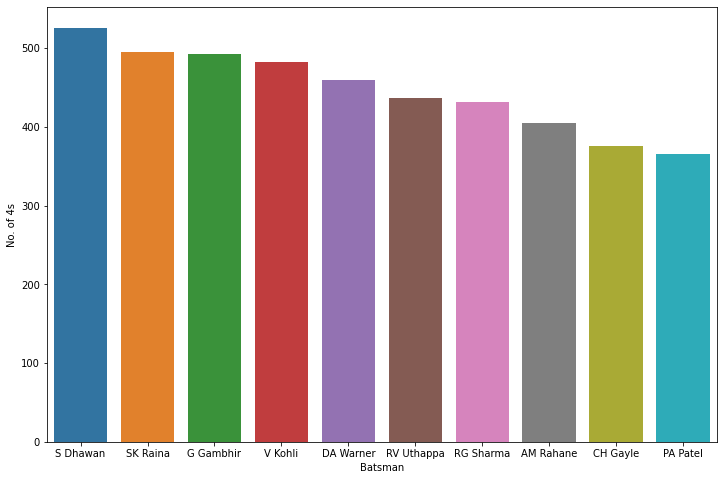

In [ ]:
plt.figure(figsize=(12,8))
boundries_4 = df_deliveries[df_deliveries['batsman_runs'] == 4]['batsman'].value_counts()[:10]
sns.barplot(y=boundries_4,x=boundries_4.index,orient='v')
plt.xlabel('Batsman')
plt.ylabel('No. of 4s')
plt.show()


**Most 6's by Batsman (Top 10)**

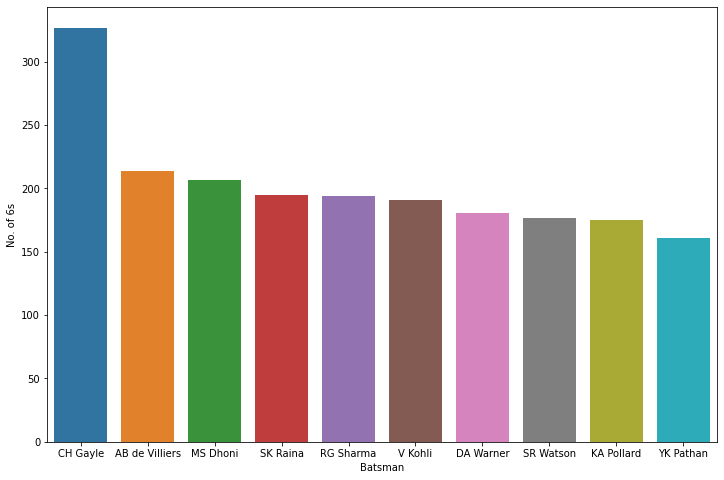

In [ ]:
plt.figure(figsize=(12,8))
boundries_6 = df_deliveries[df_deliveries['batsman_runs'] == 6]['batsman'].value_counts()[:10]
sns.barplot(y=boundries_6,x=boundries_6.index,orient='v')
plt.xlabel('Batsman')
plt.ylabel('No. of 6s')
plt.show()

It can be easy seen that when it comes to 6s, Chris Gayle trumps all other players. But when it comes to 4s, Indian Batsman take lead, with Shikhar Dhawan, Raina and Gambhir leading the charge.

**Highest Totals by IPL teams in an Innings (Top 10)**

In [ ]:
highest_team_score = df_deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().droplevel(level=0).sort_values(ascending=False)[:10]
highest_team_score = highest_team_score.reset_index()
highest_team_score.index = np.arange(1, len(highest_team_score) + 1)
highest_team_score

,batting_team,total_runs
1,Royal Challengers Bangalore,263
2,Kolkata Knight Riders,250
3,Royal Challengers Bangalore,248
4,Chennai Super Kings,246
5,Kolkata Knight Riders,241
6,Chennai Super Kings,240
7,Royal Challengers Bangalore,235
8,Sunrisers Hyderabad,233
9,Kings XI Punjab,232
10,Sunrisers Hyderabad,232


It can be observed that RCB leads in high scores category, followed by Chennai and Sunrisers Hyderabad

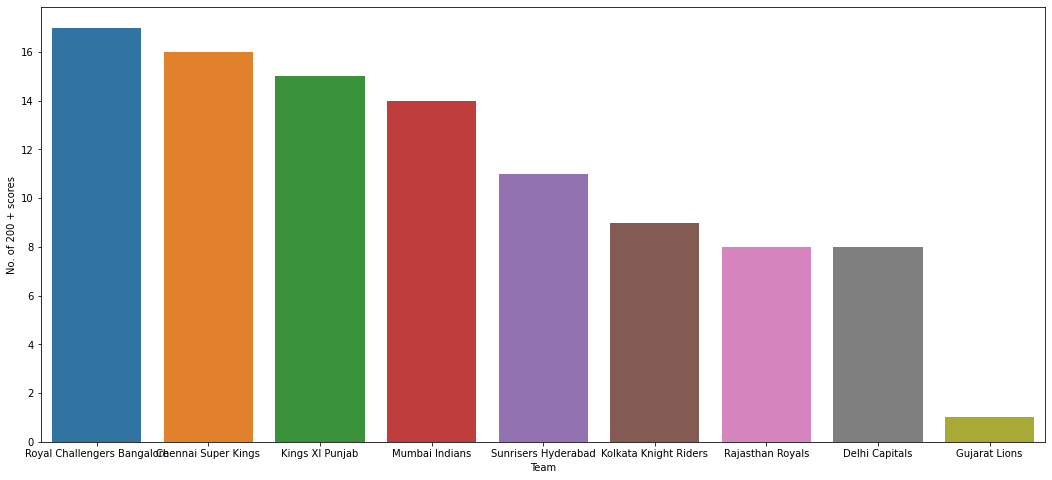

In [ ]:
# looking at teams with most number innings score of 200+
plt.figure(figsize=(18,8))
scores = df_deliveries.groupby(['batting_team','match_id'])['total_runs'].sum()
scores_200 = scores[scores > 200].droplevel(level=1).groupby('batting_team').count().sort_values(ascending=False)
sns.barplot(y=scores_200,x=scores_200.index,orient='v')
plt.xlabel('Team')
plt.ylabel('No. of 200 + scores')
plt.show()

It can be observed Royal Challengers Bangalore does PLAY BOLD and are the leaders when it comes to 200+ scores, narrowly followed by Chennai Superkings. Kochi Tuskers have never scored more than 200+ runs on an innings which is clearly evident from the above plot. However, one important point is that *Mumbai Indians*, team with most number of IPL trophies are in *fourth position when comes to 200+ scores*. This brings us to an interesting question, **is there any correlation between team winning percentage and number of times any team has scored more than 200+ score?**

In [ ]:
# now creating a new dataframe to calculate win percentage of IPL teams
# matches played by each team
total_team_matches = df_deliveries.groupby(['bowling_team','match_id']).count().droplevel(level=1).index.value_counts().reset_index()
# number of times a team have won the matches
winners_df = df_matches.winner.value_counts().reset_index()
# merging bothe above created dataframes
matches_winners_df = pd.merge(total_team_matches,winners_df,on='index')
# and thus calculating the win percentage
# win percentage
matches_winners_df['win_percent'] = round(100* matches_winners_df['winner']/matches_winners_df['bowling_team'],2)
matches_winners_df.rename(columns={'index':'team','bowling_team':'matches_played','winner':'matches_won'},inplace=True)
matches_winners_df

,team,matches_played,matches_won,win_percent
0,Mumbai Indians,187,109,58.29
1,Sunrisers Hyderabad,183,87,47.54
2,Royal Challengers Bangalore,179,84,46.93
3,Kolkata Knight Riders,178,92,51.69
4,Kings XI Punjab,176,82,46.59
5,Delhi Capitals,176,77,43.75
6,Chennai Super Kings,164,100,60.98
7,Rajasthan Royals,147,75,51.02
8,Rising Pune Supergiants,76,27,35.53
9,Gujarat Lions,30,13,43.33


In [ ]:
# now checking what is the average of teams in poweplay overs
powerplay_df = df_deliveries[df_deliveries['over']<6].groupby(['match_id','batting_team']).sum()['total_runs'].groupby('batting_team').mean().sort_values(ascending=False).reset_index()
# joining the matches_winners_df with powerplay_df
matches_winners_df['avg_powerplay_score'] = matches_winners_df.team.map(powerplay_df.set_index('batting_team')['total_runs'])


In [ ]:
# also creating new dataframe that will show us number of times teams are scoring 200+ in an innings
scores_200_df = scores_200.to_frame().reset_index()
scores_200_df.rename(columns={'batting_team':'team','total_runs': 'No. of 200+ scores'}, inplace=True)
team_200_powerplay_win_df = pd.merge(matches_winners_df,scores_200_df,how='left',on='team')
team_200_powerplay_win_df['No. of 200+ scores'] = team_200_powerplay_win_df['No. of 200+ scores'].fillna(0)

In [ ]:
team_200_powerplay_win_df['No. of 200+ scores'] = team_200_powerplay_win_df['No. of 200+ scores'].astype(int)
team_200_powerplay_win_df

,team,matches_played,matches_won,win_percent,avg_powerplay_score,No. of 200+ scores
0,Mumbai Indians,187,109,58.29,36.818182,14
1,Sunrisers Hyderabad,183,87,47.54,38.868852,11
2,Royal Challengers Bangalore,179,84,46.93,37.355556,17
3,Kolkata Knight Riders,178,92,51.69,39.179775,9
4,Kings XI Punjab,176,82,46.59,38.392045,15
5,Delhi Capitals,176,77,43.75,38.954802,8
6,Chennai Super Kings,164,100,60.98,36.926829,16
7,Rajasthan Royals,147,75,51.02,37.157534,8
8,Rising Pune Supergiants,76,27,35.53,35.840000,0
9,Gujarat Lions,30,13,43.33,42.166667,1


**Over here we will try to find out if there is any correlation between win percentage with average powerplay score and number of times the team has scored more than 200 runs in an innings. Also, we will try to plot a graph and try to figure out what is average powerplay scores' relationship with number of times team scoring more than 200 runs**

In [ ]:
corr_df = team_200_powerplay_win_df.corr()
corr_df

,matches_played,matches_won,win_percent,avg_powerplay_score,No. of 200+ scores
matches_played,1.000000,0.965434,0.564737,-0.310129,0.860723
matches_won,0.965434,1.000000,0.754932,-0.336426,0.891444
win_percent,0.564737,0.754932,1.000000,-0.188418,0.698114
avg_powerplay_score,-0.310129,-0.336426,-0.188418,1.000000,-0.293885
No. of 200+ scores,0.860723,0.891444,0.698114,-0.293885,1.000000


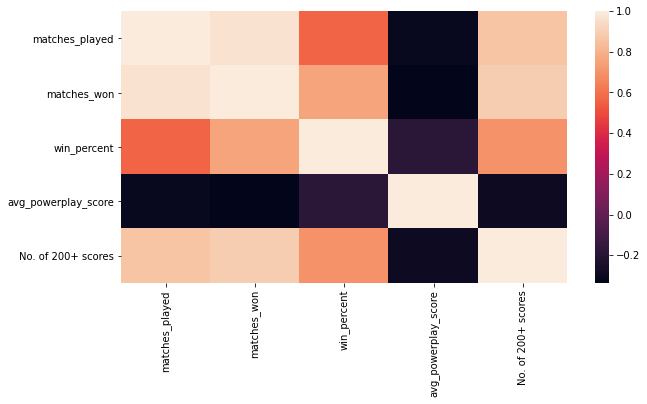

In [ ]:
# Corelation heat map
plt.figure(figsize=(10,5))
sns.heatmap(corr_df)

Text(0.5, 0, 'teams')

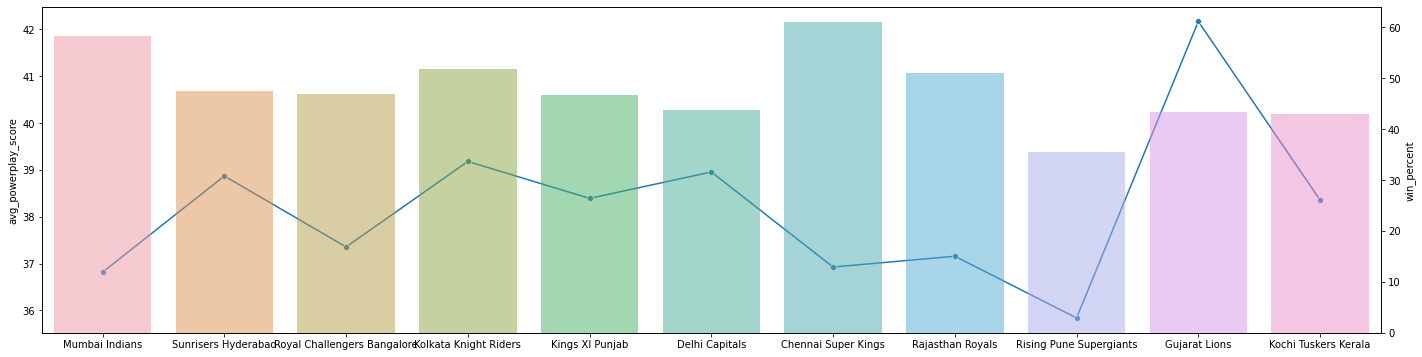

In [ ]:
# creating a graph showing average powerplay score as line graph and win percentage as bars
ax1 = sns.set_style(style=None, rc=None )

fig, ax1 = plt.subplots(figsize=(24,6))

sns.lineplot(data = team_200_powerplay_win_df['avg_powerplay_score'], marker='o', sort = False, ax=ax1)
ax2 = ax1.twinx()

sns.barplot(data = team_200_powerplay_win_df, x='team', y='win_percent', alpha=0.5, ax=ax2)
plt.xlabel('teams')

Looking at the above graph it can be concluded that teams with higher win percentage tend to have more number of times scored more than 200+ scores in an innings. However, looking at correlation between average powerplay scores and the number of times teams have scored more than 200+ runs, we can see that it is is bit negative. We may infer from this that, team have tried to played steady during the initial powerplay overs and down the line power-hitters have helped their teams to score more than 200 runs. That is why we can see that teams like to keep power hitters at their middle order and depending upon match situation they change the positions of their power-hitters. We can also obseve this fact in the plot above as Mumbai Indians and Chennai Superkings, teams with very high Win percentage have maintained low average powerplay scores.

**Running between the wickets**: Creating list of players who were run out most number of times depending upon the number of number of innings they have played. Here we will take percentage times a batsman got runout per innings played


In [ ]:
# creating a df of runouts
run_outs_df = df_deliveries[df_deliveries['dismissal_kind']=='run out']['player_dismissed'].value_counts().reset_index()
# creating a df for number of inning played by the batsman
batsman_innings_df = df_deliveries.groupby(['batsman','match_id']).count().droplevel(level=1).index.value_counts()
batsman_innings_df=batsman_innings_df.reset_index()
runout_batsman = pd.merge(run_outs_df,batsman_innings_df,on="index",how='left')
runout_batsman.dropna(axis=0,inplace=True)
runout_batsman.rename(columns={"batsman":"innings_played","player_dismissed":"num_of_times_runouts","index":"batsman"}, inplace=True)
runout_batsman['innings_played'] = runout_batsman['innings_played'].astype(int)
# Calculating a new column with the percentage of times batsman got runout per innings
runout_batsman['percent_runout_per_innings'] = round(100*runout_batsman['num_of_times_runouts']/runout_batsman['innings_played'],2)


In [ ]:
runout_batsman.sort_values('percent_runout_per_innings',ascending=False)[:10]

,batsman,num_of_times_runouts,innings_played,percent_runout_per_innings
265,H Das,1,1,100.0
269,AA Noffke,1,1,100.0
225,VS Yeligati,1,1,100.0
171,J Yadav,2,2,100.0
177,S Tyagi,1,1,100.0
214,SS Shaikh,1,1,100.0
178,DJ Muthuswami,1,1,100.0
222,C Nanda,1,1,100.0
103,L Ronchi,3,5,60.0
191,SA Abbott,1,2,50.0


Over here we can observe that for few players, runout percentage is very high but at the same time, we can also see that they have played very less number of innings; thus analysis on this won't provide us correct results. As a fact we will take only those players who have played more than 10 innings. This we will help us to provide better analysis of the players with their "running-between-wickets"

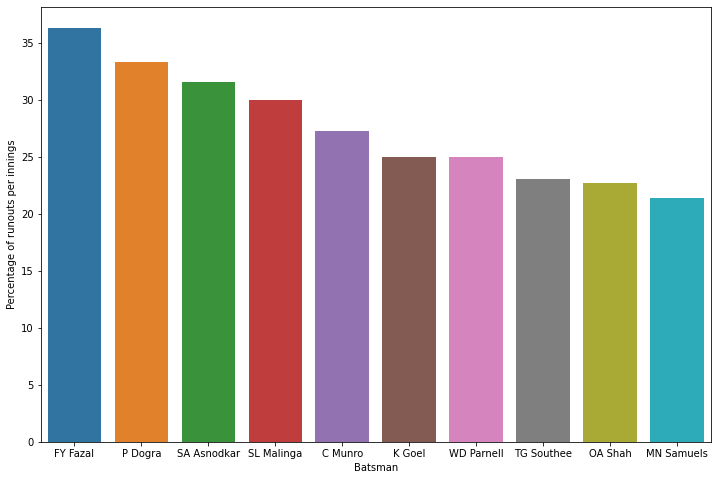

In [ ]:
runout_batsman_more_10_innings= runout_batsman[runout_batsman['innings_played']>10]
plt.figure(figsize=(12,8))
runout_percentage = runout_batsman_more_10_innings.sort_values('percent_runout_per_innings',ascending=False)[:10]
sns.barplot(y=runout_percentage['percent_runout_per_innings'],x=runout_percentage['batsman'])
plt.xlabel('Batsman')
plt.ylabel('Percentage of runouts per innings')
plt.show()

This graph provides info about top 10 players who are prone to getting runouts. They need to work on their fitness and running between the wickets.

**Bowling Statistics**

In [ ]:
bowler_df = pd.DataFrame(df_deliveries['bowler'].value_counts())
bowler_df

,bowler
Harbhajan Singh,3451
A Mishra,3172
PP Chawla,3157
R Ashwin,3016
SL Malinga,2974
...,...
RS Gavaskar,6
C Ganapathy,6
SPD Smith,2
SN Khan,2


Here we can see that there are some bowlers, who have done very less number of balls. Such as players like AC Gilchrist, who are wicket-keeper and have done balling just for mere enjoyment. Thus we will be consider only those bowlers who have bowled atleast 120 deliveries

In [ ]:
# Creating bowlers df using dict
bowlers_dict = {}
for bowler in df_deliveries['bowler']:
  if bowler not in bowlers_dict.keys():
    bowlers_dict[bowler] = 1
  else:
    bowlers_dict[bowler] += 1 
bowlers_df = pd.DataFrame.from_dict(bowlers_dict, orient='index').mean(axis=1).reset_index().rename(columns={'index':'bowler',0:'num_of_deliveries'}).sort_values(by=['num_of_deliveries'], ascending=False)
# creating new dict with bowlers who have done atleast 120 balls
regular_bowlers_df = bowlers_df[bowlers_df['num_of_deliveries']>120]

totalruns_by_bowlers_df = pd.pivot_table(df_deliveries, index=['bowler'],values=['noball_runs','wide_runs','batsman_runs','extra_runs'],aggfunc=np.sum)

# doing a left join between regular bowlers df and total runs by bowlers df
regular_bowlers = pd.merge(regular_bowlers_df, totalruns_by_bowlers_df, on ='bowler', how ='left')
regular_bowlers


,bowler,num_of_deliveries,batsman_runs,extra_runs,noball_runs,wide_runs
0,Harbhajan Singh,3451.0,3880,170,3,96
1,A Mishra,3172.0,3727,123,20,57
2,PP Chawla,3157.0,4022,131,1,63
3,R Ashwin,3016.0,3224,167,2,111
4,SL Malinga,2974.0,3218,293,20,152
...,...,...,...,...,...,...
236,S Ladda,141.0,221,4,1,2
237,V Sehwag,138.0,233,3,1,1
238,P Amarnath,132.0,236,5,0,0
239,R Shukla,130.0,198,19,3,7


In [ ]:
# creating a new column in regular_bowlers with the name bowler_runs as while calculating economy of bowlers, we need not include bye runs and leg-bye runs
regular_bowlers['bowler_runs'] = regular_bowlers['batsman_runs'] + regular_bowlers['noball_runs'] + regular_bowlers['wide_runs']
regular_bowlers


,bowler,num_of_deliveries,batsman_runs,extra_runs,noball_runs,wide_runs,bowler_runs
0,Harbhajan Singh,3451.0,3880,170,3,96,3979
1,A Mishra,3172.0,3727,123,20,57,3804
2,PP Chawla,3157.0,4022,131,1,63,4086
3,R Ashwin,3016.0,3224,167,2,111,3337
4,SL Malinga,2974.0,3218,293,20,152,3390
...,...,...,...,...,...,...,...
236,S Ladda,141.0,221,4,1,2,224
237,V Sehwag,138.0,233,3,1,1,235
238,P Amarnath,132.0,236,5,0,0,236
239,R Shukla,130.0,198,19,3,7,208


Now we will be adding few more columns in regular bowler df for certain analysis pertaining to regular bowler statistics

In [ ]:
# Economy Rate column
regular_bowlers['economy'] = round(regular_bowlers['bowler_runs']/ (regular_bowlers['num_of_deliveries']//6),2)

In [ ]:
# fetching wickets taken by bowlers
bowlers_wict_dict = {}
for index, rows in df_deliveries.iterrows():
  wicket = df_deliveries.loc[index,'dismissal_kind']
  if (wicket not in ["run out","obstructing the feild","retired hurt",np.nan]):
      bowler_name = df_deliveries.loc[index,'bowler']
      if bowler_name not in bowlers_wict_dict.keys():
        bowlers_wict_dict[bowler_name] = 1
      else:
        bowlers_wict_dict[bowler_name] += 1

wickets_df = pd.DataFrame.from_dict(bowlers_wict_dict, orient='index').mean(axis=1).reset_index().rename(columns={'index':'bowler',0:'Wickets'}).sort_values(by=['Wickets'], ascending=False)

# now doing left join between regular bowlers dataframe and wickets dataframe
regular_bowlers = pd.merge(regular_bowlers, wickets_df, on ='bowler', how ='left')


In [ ]:
# determining strike rate and bowling average of each bowler
regular_bowlers['strike_rate'] = round(regular_bowlers['num_of_deliveries']/regular_bowlers['Wickets'],2)
regular_bowlers['bowling_average'] = round(regular_bowlers['batsman_runs']/regular_bowlers['Wickets'],2)

regular_bowlers[["num_of_deliveries","Wickets"]] = regular_bowlers[["num_of_deliveries","Wickets"]].astype(int)
regular_bowlers

,bowler,num_of_deliveries,batsman_runs,extra_runs,noball_runs,wide_runs,bowler_runs,economy,Wickets,strike_rate,bowling_average
0,Harbhajan Singh,3451,3880,170,3,96,3979,6.92,150,23.01,25.87
1,A Mishra,3172,3727,123,20,57,3804,7.20,156,20.33,23.89
2,PP Chawla,3157,4022,131,1,63,4086,7.77,149,21.19,26.99
3,R Ashwin,3016,3224,167,2,111,3337,6.65,125,24.13,25.79
4,SL Malinga,2974,3218,293,20,152,3390,6.85,170,17.49,18.93
...,...,...,...,...,...,...,...,...,...,...,...
236,S Ladda,141,221,4,1,2,224,9.74,5,28.20,44.20
237,V Sehwag,138,233,3,1,1,235,10.22,6,23.00,38.83
238,P Amarnath,132,236,5,0,0,236,10.73,7,18.86,33.71
239,R Shukla,130,198,19,3,7,208,9.90,5,26.00,39.60


**Creating few graphs to fetch bowling statistics**

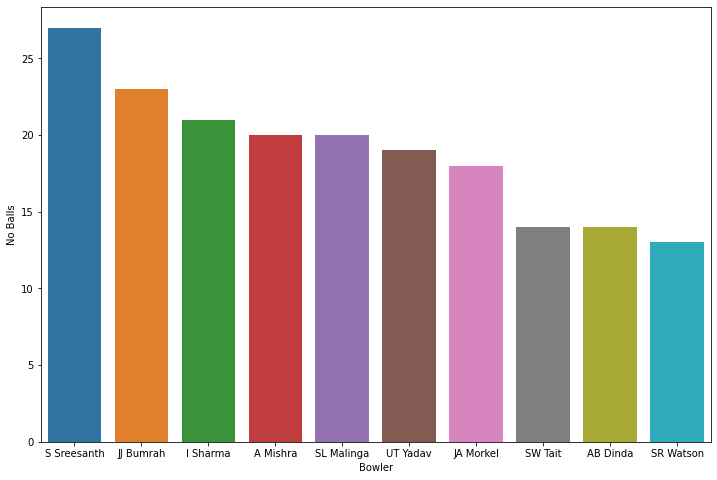

In [ ]:
# Most no balls bowled
no_balls_df = regular_bowlers[["bowler","noball_runs"]]
no_balls_df = no_balls_df.sort_values('noball_runs',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=no_balls_df['noball_runs'],x=no_balls_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('No Balls')
plt.show()

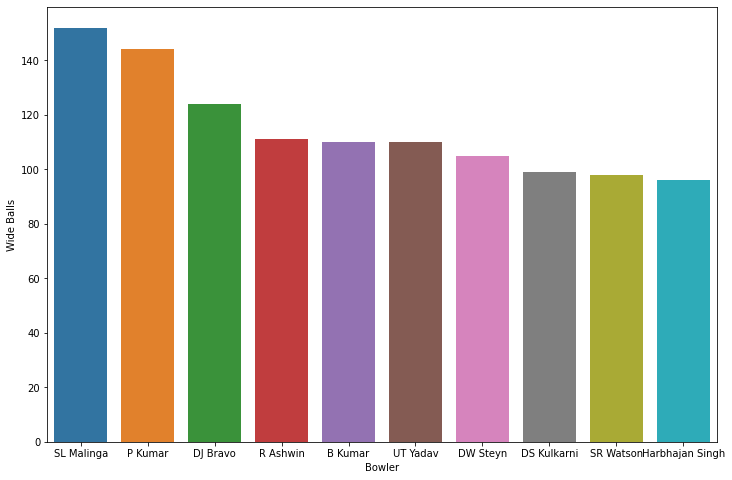

In [ ]:
# most number of wide balls
wide_balls_df = regular_bowlers[["bowler","wide_runs"]]
wide_balls_df = wide_balls_df.sort_values('wide_runs',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=wide_balls_df['wide_runs'],x=wide_balls_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Wide Balls')
plt.show()

These above mentioned bowlers need to work on their bowling styles

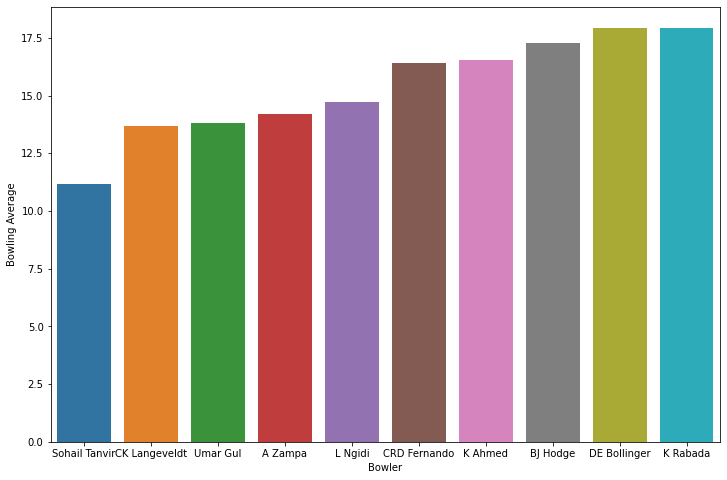

In [ ]:
# Top 10 bowlers with best average
bowling_average_df = regular_bowlers[["bowler","bowling_average"]]
bowling_average_df = bowling_average_df.sort_values('bowling_average',ascending=True)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=bowling_average_df['bowling_average'],x=bowling_average_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Bowling Average')
plt.show()

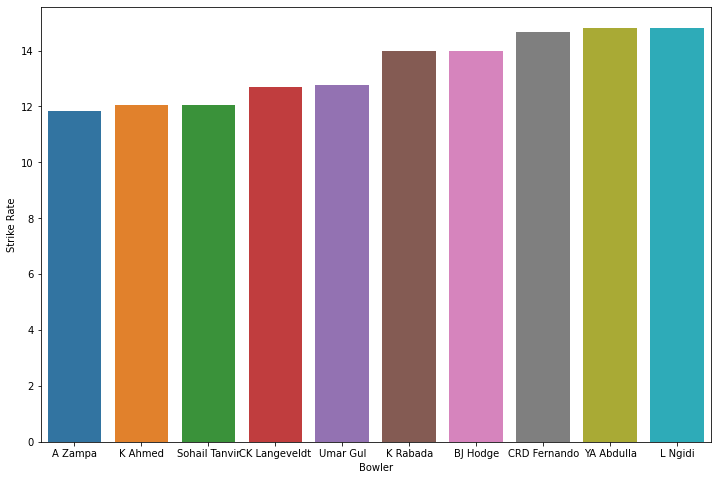

In [ ]:
# Top 10 bowlers in terms of strike rate
strike_rate_df = regular_bowlers[["bowler","strike_rate"]]
strike_rate_df = strike_rate_df.sort_values('strike_rate',ascending=True)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=strike_rate_df['strike_rate'],x=strike_rate_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Strike Rate')
plt.show()

In [ ]:
# Players with best bowling averages and strike rates
df3=pd.merge(bowling_average_df,strike_rate_df, how='inner')
df3

,bowler,bowling_average,strike_rate
0,Sohail Tanvir,11.18,12.05
1,CK Langeveldt,13.69,12.69
2,Umar Gul,13.83,12.75
3,A Zampa,14.21,11.84
4,L Ngidi,14.73,14.82
5,CRD Fernando,16.41,14.65
6,K Ahmed,16.55,12.05
7,BJ Hodge,17.29,14.00
8,K Rabada,17.94,14.00


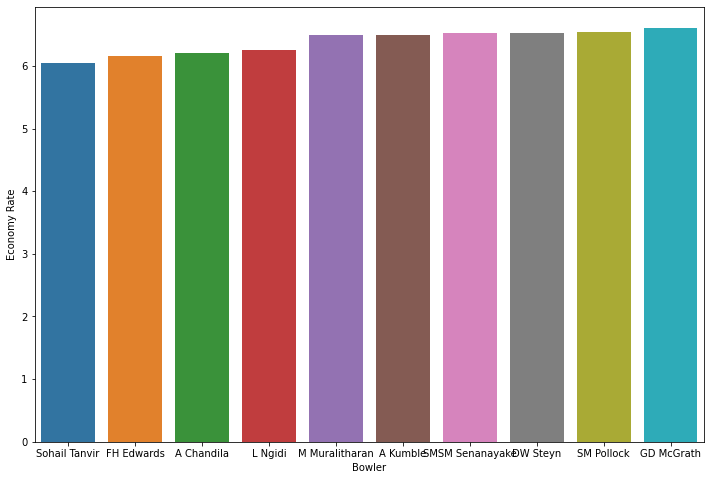

In [ ]:
# Top 10 bowlers in terms of economy rate
economy_rate_df = regular_bowlers[["bowler","economy"]]
economy_rate_df = economy_rate_df.sort_values('economy',ascending=True)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=economy_rate_df['economy'],x=economy_rate_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Economy Rate')
plt.show()

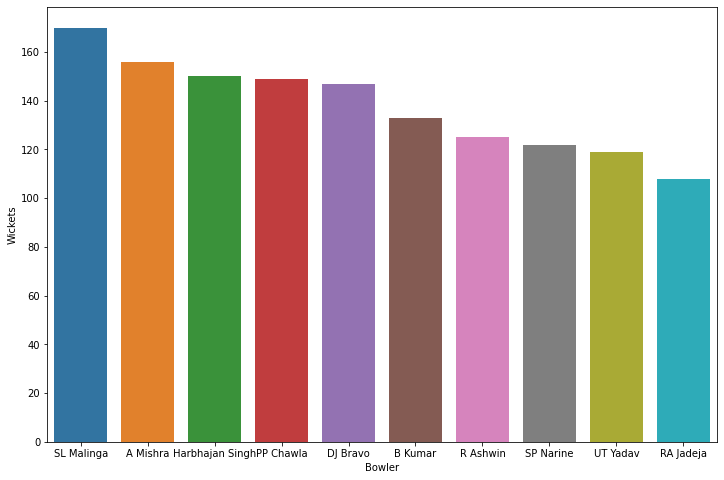

In [ ]:
# Top 10 Wicket takers
top_wickets_df = regular_bowlers[["bowler","Wickets"]]
top_wickets_df = top_wickets_df.sort_values('Wickets',ascending=False)[:10]
plt.figure(figsize=(12,8))
sns.barplot(y=top_wickets_df['Wickets'],x=top_wickets_df['bowler'])
plt.xlabel('Bowler')
plt.ylabel('Wickets')
plt.show()

In [ ]:
# Most number of runs conceded in an innings 
most_runs_innings_bowler = pd.pivot_table(df_deliveries, index=['bowler','match_id','inning'],values=['batsman_runs'],aggfunc=np.sum)
most_runs_innings_bowler['batsman_runs'] = most_runs_innings_bowler['batsman_runs'].astype(int)
most_runs_innings_bowler.sort_values(by=['batsman_runs'], ascending = False,inplace=True)
most_runs_innings_bowler=most_runs_innings_bowler[:5].reset_index()
most_runs_innings_bowler.index = np.arange(1, len(most_runs_innings_bowler) + 1)
most_runs_innings_bowler

,bowler,match_id,inning,batsman_runs
1,Basil Thampi,7944,1,70
2,M Ur Rahman,11339,1,66
3,UT Yadav,438,1,64
4,I Sharma,435,1,63
5,TG Southee,11153,2,62


**We can also try to find out the effect of extras on match's performance by a IPL team**

In [ ]:
# Most runs given in extras
extras = df_deliveries.groupby(['batting_team'])['extra_runs'].agg('sum').sort_values(ascending=False)
extras_df = extras.to_frame().reset_index().rename(columns={'batting_team':'team'})
extras_df
# Now creating a new dataframe 
matches_extra_df = pd.merge(matches_winners_df,extras_df,how='left',on='team')
matches_extra_df.drop('avg_powerplay_score',axis=1,inplace=True)
matches_extra_df

,team,matches_played,matches_won,win_percent,extra_runs
0,Mumbai Indians,187,109,58.29,1645
1,Sunrisers Hyderabad,183,87,47.54,1387
2,Royal Challengers Bangalore,179,84,46.93,1351
3,Kolkata Knight Riders,178,92,51.69,1524
4,Kings XI Punjab,176,82,46.59,1425
5,Delhi Capitals,176,77,43.75,1373
6,Chennai Super Kings,164,100,60.98,1314
7,Rajasthan Royals,147,75,51.02,1090
8,Rising Pune Supergiants,76,27,35.53,519
9,Gujarat Lions,30,13,43.33,233


In [ ]:
# Now we will be creating a new column in the newly constructed dataframe corresponsing to average extra_runs given by a team per match
matches_extra_df['extra_per_match'] = round(matches_extra_df['extra_runs']/matches_extra_df['matches_played'],2)
matches_extra_df

,team,matches_played,matches_won,win_percent,extra_runs,extra_per_match
0,Mumbai Indians,187,109,58.29,1645,8.80
1,Sunrisers Hyderabad,183,87,47.54,1387,7.58
2,Royal Challengers Bangalore,179,84,46.93,1351,7.55
3,Kolkata Knight Riders,178,92,51.69,1524,8.56
4,Kings XI Punjab,176,82,46.59,1425,8.10
5,Delhi Capitals,176,77,43.75,1373,7.80
6,Chennai Super Kings,164,100,60.98,1314,8.01
7,Rajasthan Royals,147,75,51.02,1090,7.41
8,Rising Pune Supergiants,76,27,35.53,519,6.83
9,Gujarat Lions,30,13,43.33,233,7.77


From the above table, it can seen that variance between the extra runs per match given by the teams is very less except for Kochi Tuskers Kerala; thus there is no point of finding the correlation for these variable. And we can assume that there is no depending between extra runs and match outcome.

Text(0.5, 0, 'teams')

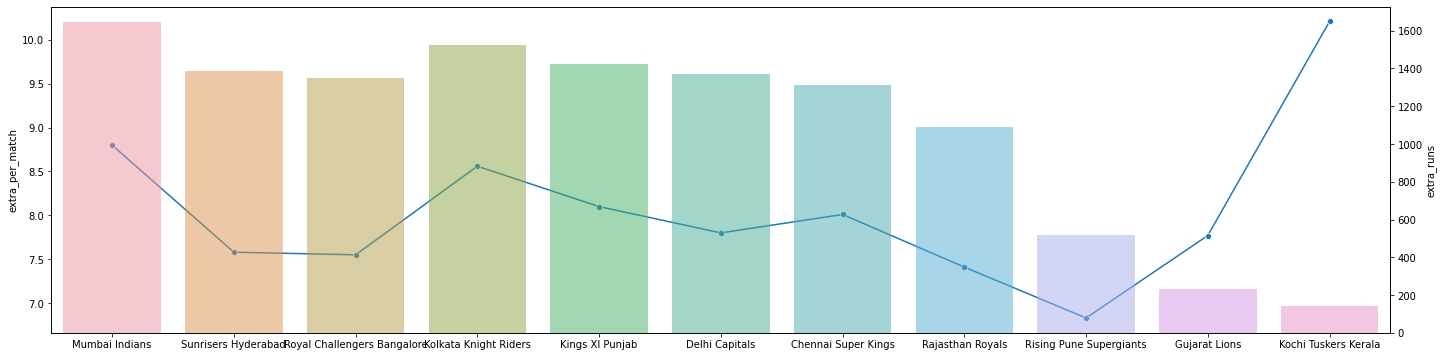

In [ ]:
# creating a graph showing extra runs and teams
ax3 = sns.set_style(style=None, rc=None )

fig, ax3 = plt.subplots(figsize=(24,6))

sns.lineplot(data = matches_extra_df['extra_per_match'], marker='o', sort = False, ax=ax3)
ax4 = ax3.twinx()

sns.barplot(data = matches_extra_df, x='team', y='extra_runs', alpha=0.5, ax=ax4)
plt.xlabel('teams')

**We can create a table to identify the history of a batsman getting out by any particular bowling style**

In [ ]:
# batsman getting out
batsman_df = pd.DataFrame(columns = ['batsman', 'bowler', 'dismissal_kind'])
for index, rows in df_deliveries.iterrows():
  wicket = df_deliveries.loc[index,'dismissal_kind']
  batsman_ = df_deliveries.loc[index,'player_dismissed']
  bowler_ = df_deliveries.loc[index,'bowler']
  if (wicket not in ["run out","obstructing the feild","retired hurt",np.nan]):
    # append rows to an empty DataFrame
    batsman_df = batsman_df.append({'batsman' : batsman_, 'bowler' : bowler_, 'dismissal_kind' : wicket}, 
                ignore_index = True)
batsman_df['dismiss_bowling_style'] = batsman_df.bowler.map(df_players.set_index('Player_Name')['Bowling_Skill'])
batsman_weakness_df = batsman_df.groupby(['batsman','dismiss_bowling_style']).dismissal_kind.agg([len]).unstack()
batsman_weakness_df = batsman_weakness_df.fillna(0)
batsman_weakness_df.reset_index()
# changing multi index columns to standard columns
batsman_weakness_df.columns = ['Left-arm fast-medium','Right-arm medium', 'Legbreak googly', 'Left-arm fast','Right-arm offbreak','Slow left-arm orthodox','Left-arm medium-fast','Right-arm medium-fast','Right-arm fast-medium','Legbreak','Slow left-arm chinaman','Right-arm fast','Left-arm medium']

# converting the values into percentage
cols= ['Left-arm fast-medium', 'Right-arm medium', 'Legbreak googly', 'Left-arm fast','Right-arm offbreak','Slow left-arm orthodox','Left-arm medium-fast','Right-arm medium-fast','Right-arm fast-medium','Legbreak','Slow left-arm chinaman','Right-arm fast','Left-arm medium']
batsman_weakness_df[cols] = round(batsman_weakness_df[cols].div(batsman_weakness_df[cols].sum(axis=1), axis=0).multiply(100),2)
batsman_weakness_df

,Left-arm fast-medium,Right-arm medium,Legbreak googly,Left-arm fast,Right-arm offbreak,Slow left-arm orthodox,Left-arm medium-fast,Right-arm medium-fast,Right-arm fast-medium,Legbreak,Slow left-arm chinaman,Right-arm fast,Left-arm medium
batsman,,,,,,,,,,,,,
A Ashish Reddy,0.00,7.69,0.00,7.69,0.00,0.00,15.38,7.69,30.77,23.08,7.69,0.00,0.00
A Chopra,0.00,0.00,25.00,0.00,0.00,0.00,25.00,0.00,25.00,0.00,0.00,0.00,25.00
A Choudhary,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00
A Flintoff,0.00,0.00,0.00,50.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00
A Hales,0.00,0.00,0.00,0.00,16.67,0.00,0.00,0.00,33.33,16.67,33.33,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YV Takawale,12.50,0.00,0.00,0.00,0.00,12.50,0.00,12.50,25.00,12.50,25.00,0.00,0.00
Yashpal Singh,0.00,0.00,0.00,0.00,25.00,25.00,0.00,0.00,0.00,50.00,0.00,0.00,0.00
Younis Khan,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


Trying to find how a batsman got out?

In [ ]:
# trying to fetch the unique values of the way in which a player can get out
df_deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [ ]:
dismissals_df = df_deliveries.groupby(['player_dismissed','dismissal_kind'])['match_id'].count().unstack().reset_index()
dismissals_df.fillna(0,inplace=True)
dismissals_df[['bowled','caught','caught and bowled','hit wicket','lbw','obstructing the field','retired hurt','run out','stumped']] = dismissals_df[['bowled','caught','caught and bowled','hit wicket','lbw','obstructing the field','retired hurt','run out','stumped']].astype(int)
# removing retired hurt column
dismissals_df.drop('retired hurt', axis=1, inplace=True)
dismissals_df.rename(columns={'dismissal_kind':'index'},inplace=True)
dismissals_df

dismissal_kind,player_dismissed,bowled,caught,caught and bowled,hit wicket,lbw,obstructing the field,run out,stumped
0,A Ashish Reddy,5,8,0,0,0,0,2,0
1,A Chopra,0,2,0,0,1,0,2,1
2,A Choudhary,0,1,0,0,0,0,0,0
3,A Flintoff,0,1,1,0,0,0,0,0
4,A Hales,2,3,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...
482,YV Takawale,2,4,0,0,2,0,0,0
483,Yashpal Singh,0,4,0,0,0,0,0,0
484,Younis Khan,1,0,0,0,0,0,0,0
485,Yuvraj Singh,10,84,2,1,5,0,6,3


In [ ]:
dismissals_df.columns.values

array(['player_dismissed', 'bowled', 'caught', 'caught and bowled',
       'hit wicket', 'lbw', 'obstructing the field', 'run out', 'stumped'],
      dtype=object)